In [134]:
import qiskit as qk

In [135]:
''' 
qiskit notes
- can simulate a QC
- can submit job to IBMQ for IBMQ to execute
'''

' \nqiskit notes\n- can simulate a QC\n- can submit job to IBMQ for IBMQ to execute\n'

In [136]:
qr = qk.QuantumRegister(2)   # 2 qubit register

In [137]:
cr = qk.ClassicalRegister(2)   # 2 bit classical register

In [138]:
quantum_circuit = qk.QuantumCircuit(qr, cr)   
''' quantum circuit acts on 2 qubit quantum register and 2
bit classical register'''

' quantum circuit acts on 2 qubit quantum register and 2\nbit classical register'

In [139]:
# perform a Hadamard gate on the first qubit
quantum_circuit.h(qr[0])   

In [140]:
# perform control-not gate wheren qr[0] is control qubit and qr[1] is target qubit
quantum_circuit.cx(qr[0], qr[1])
# these two actions (Hadamard on first, plus CNOT[0,1] will entangle them)

In [141]:
''' Hadamard gate does these actions:
|0> --> |+>
|1> --> |->
Converse:
|+> --> |0>
|-> --> |1>

Often used at the start of an algorithm to create a superpositon.
Often used at the end of an alogirithm (before measurement) to get PHASE INFORMATION
(for example, distinguish |+> from |->)
'''
'''Controlled-NOT does these actions:
- If control qubit is |1>, it flips the target qubit.
- Target and control qubit are entangled. This is the Bell state.
'''

'Controlled-NOT does these actions:\n- If control qubit is |1>, it flips the target qubit.\n- Target and control qubit are entangled. This is the Bell state.\n'

In [142]:
''' Measurements added to quantum circuit
We can simply add the measurements to the quantum circuit. BUT since we want to 
perform the measurements (1) with the Hadamard gate and (2) without the Hadamard
gate, it "will" be easier to create seperate circuits for the measurements
and then combine them with out "entangling circuit".
1. Create a seperate quantum circuit 
'''

' Measurements added to quantum circuit\nWe can simply add the measurements to the quantum circuit. BUT since we want to \nperform the measurements (1) with the Hadamard gate and (2) without the Hadamard\ngate, it "will" be easier to create seperate circuits for the measurements\nand then combine them with out "entangling circuit".\n1. Create a seperate quantum circuit \n'

In [143]:
# measure_Z will conduct a measurement in the standard Z-basis
measure_Z = qk.QuantumCircuit(qr, cr)

In [144]:
measure_Z.measure(qr, cr) 
# allows us to measure the qubits in qr and store the results in cr

In [145]:
measure_X = qk.QuantumCircuit(qr, cr)

In [146]:
# note, we will do a Hadamard gate before the measurement, effectively measuring 
#each qubit in the x-basis, also known as the superposition basis/
measure_X.h(qr)

In [147]:
measure_X.measure(qr, cr)

In [148]:
# now that we created measurement circuits measure_X, measure_Z, we can append them
#to our entangling circuit using the addition operator +
test_Z = quantum_circuit + measure_Z

In [149]:
test_X = quantum_circuit + measure_X

In [150]:
backend_sim = qk.BasicAer.get_backend('qasm_simulator') 
# how else might we configure the backend simulator?

In [151]:
# job_1 = qk.execute([test_Z, test_X], backend_sim, shots=1000)

In [152]:
result_1 = job_1.result()

In [153]:
# Z basis state results  
result_1.get_counts(test_Z)

QiskitError: 'Data for experiment "circuit13" could not be found.'

In [154]:
result_1.get_counts(test_X)

QiskitError: 'Data for experiment "circuit14" could not be found.'

In [155]:
from qiskit.tools.visualization import plot_histogram

In [156]:
plot_histogram(result_1.get_counts(test_Z))

QiskitError: 'Data for experiment "circuit13" could not be found.'

In [157]:
plot_histogram(result_1.get_counts(test_X))

QiskitError: 'Data for experiment "circuit14" could not be found.'

In [158]:
import Qconfig   # used to communicate with IBMQ Backend

In [159]:
from qiskit import IBMQ   # newer API client to talk to IBMQ

In [160]:
# set the API k
IBMQ.save_account('dc5a43fcf2c2e9f0c0519a3939a8cfcfdcc95e73d876430b0cae626bcecb5418b33042f7011c673e44997db1abdd27eae4651befdacbe39fe6b73c6f95c09360', overwrite=True)

In [161]:
IBMQ.stored_accounts()   # see which accounts are locally stored

[{'token': 'dc5a43fcf2c2e9f0c0519a3939a8cfcfdcc95e73d876430b0cae626bcecb5418b33042f7011c673e44997db1abdd27eae4651befdacbe39fe6b73c6f95c09360',
  'url': 'https://quantumexperience.ng.bluemix.net/api'}]

In [162]:
# IBMQ.enable_account(Qconfig.APIToken)   # load the account from Qconfig file)

In [163]:
IBMQ.active_accounts()   # check which accounts are active

[{'token': 'dc5a43fcf2c2e9f0c0519a3939a8cfcfdcc95e73d876430b0cae626bcecb5418b33042f7011c673e44997db1abdd27eae4651befdacbe39fe6b73c6f95c09360',
  'url': 'https://quantumexperience.ng.bluemix.net/api'}]

In [164]:
IBMQ.backends()   # check which IBMQ "backends" are available to u

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [165]:
from qiskit.providers.ibmq import least_busy

small_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits == 5 and
                                                       not x.configuration().simulator)
least_busy(small_devices)


<IBMQBackend('ibmqx2') from IBMQ()>

In [166]:
IBMQ_backend = IBMQ.get_backend('ibmqx2')   # select IBMQ which backend you'll use

In [167]:
# backend.configuration()   # check backend config

In [168]:
# backend.properties()   # check backend properties

In [184]:
IBMQ_job = qk.execute([test_Z, test_X], IBMQ_backend, shots=1000)

In [190]:
IBMQ_job.status() 

<JobStatus.DONE: 'job has successfully run'>

In [191]:
IBMQ_job_results = IBMQ_job.result()

In [193]:
IBMQ_results_count = IBMQ_job_results.get_counts(test_X)

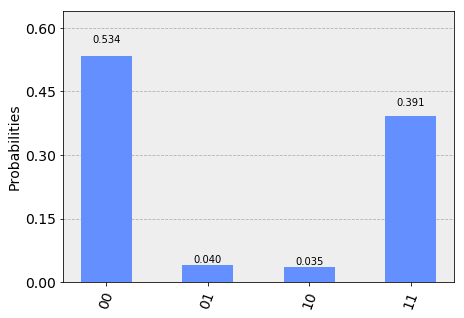

In [194]:
plot_histogram(IBMQ_results_count)